# Heart Attack Analysis & Prediction Dataset

# About this dataset
* Age : Age of the patient

* Sex : Sex of the patient

* exang: exercise induced angina (1 = yes; 0 = no)

* ca: number of major vessels (0-3)

* cp : Chest Pain type chest pain type

    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
    * trtbps : resting blood pressure (in mm Hg)

* chol : cholestoral in mg/dl fetched via BMI sensor

* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* rest_ecg : resting electrocardiographic results

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved

* target : 0= less chance of heart attack 1= more chance of heart attack

## Importing the libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the dataset

In [3]:
heart_df=pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
o2_df=pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

In [4]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
o2_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory data analysis

In [6]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot:xlabel='output', ylabel='count'>

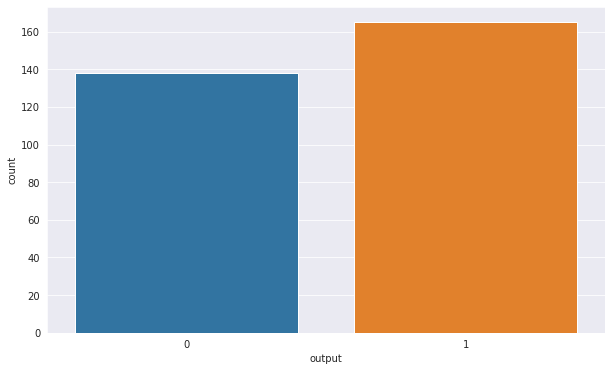

In [8]:
plt.rcParams['figure.figsize']=(10,6)
sns.set_style('darkgrid')
sns.countplot(x='output',data=heart_df)

We have more records of heart attack occured instances.

<AxesSubplot:xlabel='sex', ylabel='count'>

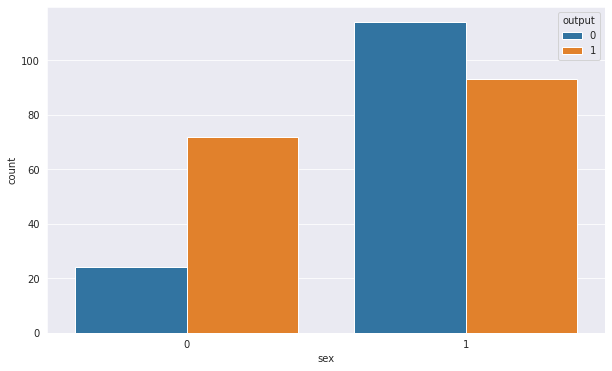

In [9]:
sns.countplot(x='sex',hue='output',data=heart_df)

Male are having more chances of a heart attack.

<AxesSubplot:xlabel='exng', ylabel='count'>

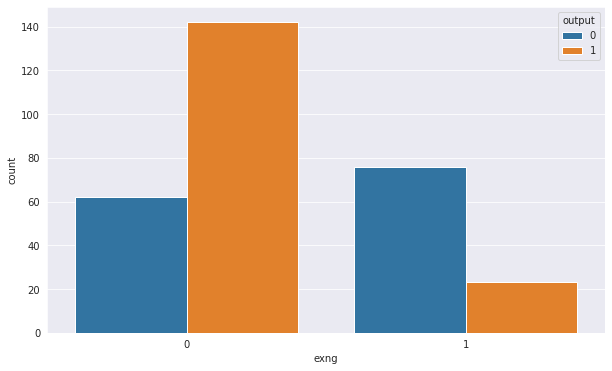

In [10]:
sns.countplot(x='exng',hue='output',data=heart_df)

There are more chances of getting heart attack when a person is idle.

<AxesSubplot:xlabel='cp', ylabel='count'>

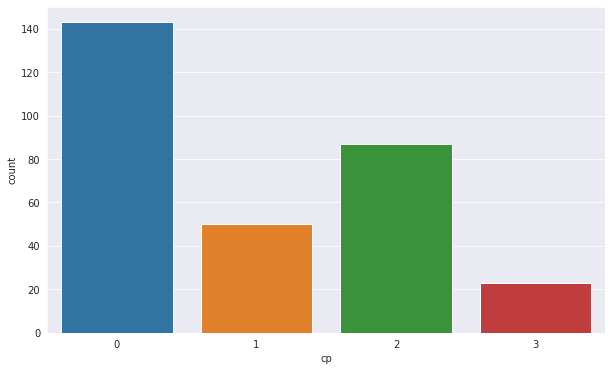

In [11]:
sns.countplot(x='cp',data=heart_df)

There are more chances of heart attack when a person is under typical angina i.e under physical exertion or emotional stress.

## Scaling and Spliting the data

In [12]:
cols=heart_df.columns.values

In [13]:
cols=np.delete(cols,-1)

In [14]:
cols

array(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'], dtype=object)

In [15]:
X=heart_df.drop(['output'],axis=1)
y=heart_df.output

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
scaled_df=pd.DataFrame(scaler.transform(X),columns=cols)

In [17]:
scaled_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_df,y,test_size=0.2,random_state=42)

## Building and Training the model

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_preds_lr=lr.predict(X_test)

### K Neighbors Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_preds_knn=knn.predict(X_test)

### Gaussian Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_preds_gnb=gnb.predict(X_test)

### Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_preds_dt=dt.predict(X_test)

### Support Vector Machine

In [23]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_preds_svm=svm.predict(X_test)

### Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_preds_rf=rf.predict(X_test)

### XG Boost Classifier

In [25]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_preds_xgb=xgb.predict(X_test)

## Evaluating the models

In [26]:
from sklearn.metrics import accuracy_score
lr_score=accuracy_score(y_test,y_preds_lr)*100
knn_score=accuracy_score(y_test,y_preds_knn)*100
gnb_score=accuracy_score(y_test,y_preds_gnb)*100
dt_score=accuracy_score(y_test,y_preds_dt)*100
svm_score=accuracy_score(y_test,y_preds_svm)*100
rf_score=accuracy_score(y_test,y_preds_rf)*100
xgb_score=accuracy_score(y_test,y_preds_xgb)*100

In [27]:
results=pd.DataFrame({
      'Model': ['Logistic Regression','K Nearest Neighbors','Gaussian Naive Bayes','Decision Tree','Support Vector Machine','Random Forest Classifier','XG Boost'],
    'Accuracy Score': [lr_score,knn_score,gnb_score,dt_score,svm_score,rf_score,xgb_score]

})
results_df=results.sort_values(by='Accuracy Score',ascending=False)
#results_df=results.set_index('Model')
print(results_df.to_string(index=False))

                   Model  Accuracy Score
     K Nearest Neighbors       91.803279
    Gaussian Naive Bayes       86.885246
  Support Vector Machine       86.885246
     Logistic Regression       85.245902
Random Forest Classifier       85.245902
           Decision Tree       81.967213
                XG Boost       81.967213


K Nearest Neighbors Classifier performed more accurately than others.

We can also include Saturation Values in the dataset if we want.